### We want to make sure M2 position and forces did not change after actuator de-energization
We can soley rely on EFD data without dealing with binary files

In [1]:
from openpyxl import load_workbook

from astropy.time import Time
from datetime import timedelta, datetime
from lsst_efd_client import EfdClient

import matplotlib.pyplot as plt
import scipy.io
import numpy as np
import pandas as pd
plt.jet()

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters();

In [2]:
client = EfdClient('summit_efd')
csc_index = 1

### Before and after we unplugged B6 power

In [85]:
bB6 = Time('2020-03-05T18:10:00') #this is UTC
end = Time('2020-03-05T18:10:05') 
df_b_B6_p = await client.select_time_series('lsst.sal.MTM2.mirrorPositionMeasured', '*', 
                                     (bB6-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)
df_b_B6_a = await client.select_time_series('lsst.sal.MTM2.axialForcesMeasured', '*', 
                                     (bB6-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)
df_b_B6_t = await client.select_time_series('lsst.sal.MTM2.tangentForcesMeasured', '*', 
                                     (bB6-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)
df_b_B6_p.head()

,piston,private_host,private_kafkaStamp,private_origin,private_rcvStamp,private_revCode,private_seqNum,private_sndStamp,thetaZPosition,xPosition,xTilt,yPosition,yTilt
2020-03-05 18:10:00.025000+00:00,0.084669,1,1.583432e+09,37859,1.583432e+09,c3c6bc7d,2799843,1.583432e+09,-5.135427e-09,0.009943,4.076154e-07,-0.016311,4.142653e-07
2020-03-05 18:10:00.073000+00:00,0.084669,1,1.583432e+09,37859,1.583432e+09,c3c6bc7d,2799852,1.583432e+09,-5.135427e-09,0.009943,4.076154e-07,-0.016311,4.142653e-07
2020-03-05 18:10:00.129000+00:00,0.084669,1,1.583432e+09,37859,1.583432e+09,c3c6bc7d,2799862,1.583432e+09,-5.135427e-09,0.009943,4.076154e-07,-0.016311,4.142653e-07
2020-03-05 18:10:00.175000+00:00,0.084669,1,1.583432e+09,37859,1.583432e+09,c3c6bc7d,2799871,1.583432e+09,-5.135427e-09,0.009943,4.076154e-07,-0.016311,4.142653e-07
2020-03-05 18:10:00.224000+00:00,0.084669,1,1.583432e+09,37859,1.583432e+09,c3c6bc7d,2799880,1.583432e+09,-5.135427e-09,0.009943,4.076154e-07,-0.016311,4.142653e-07


In [106]:
aB6 = Time('2020-03-05T18:13:00') #this is UTC
end = Time('2020-03-05T18:13:05') 
df_a_B6_p = await client.select_time_series('lsst.sal.MTM2.mirrorPositionMeasured', '*', 
                                     (aB6-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)
df_a_B6_a = await client.select_time_series('lsst.sal.MTM2.axialForcesMeasured', '*', 
                                     (aB6-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)
df_a_B6_t = await client.select_time_series('lsst.sal.MTM2.tangentForcesMeasured', '*', 
                                     (aB6-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)
df_e = await client.select_time_series('lsst.sal.MTM2.logevent_errorCode', '*', 
                                     (bB6-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)
df_a_B6_p.head()

,piston,private_host,private_kafkaStamp,private_origin,private_rcvStamp,private_revCode,private_seqNum,private_sndStamp,thetaZPosition,xPosition,xTilt,yPosition,yTilt
2020-03-05 18:13:00.027000+00:00,-27279.624553,1,1.583432e+09,37859,1.583432e+09,c3c6bc7d,2832508,1.583432e+09,-5.135427e-09,0.009943,-0.017032,-0.016311,0.029502
2020-03-05 18:13:00.077000+00:00,-27279.624553,1,1.583432e+09,37859,1.583432e+09,c3c6bc7d,2832517,1.583432e+09,-5.135427e-09,0.009943,-0.017032,-0.016311,0.029502
2020-03-05 18:13:00.126000+00:00,-27279.624553,1,1.583432e+09,37859,1.583432e+09,c3c6bc7d,2832526,1.583432e+09,-5.135427e-09,0.009943,-0.017032,-0.016311,0.029502
2020-03-05 18:13:00.176000+00:00,-27279.624553,1,1.583432e+09,37859,1.583432e+09,c3c6bc7d,2832535,1.583432e+09,-5.135427e-09,0.009943,-0.017032,-0.016311,0.029502
2020-03-05 18:13:00.225000+00:00,-27279.624553,1,1.583432e+09,37859,1.583432e+09,c3c6bc7d,2832544,1.583432e+09,-5.135427e-09,0.009943,-0.017032,-0.016311,0.029502


In [110]:
aa = df_e.errorCode
print('number of logevent with error = ', len(aa))
for i in np.unique(aa):
    idx = np.argmax(aa==i)
    print('%4d, 1st occurred: %s, %s'%(i, pd.to_datetime(df_e.private_sndStamp[idx], unit='s').strftime('%h-%d %H:%M'), 
                                       df_e.errorReport[idx]))

number of logevent with error =  174
6052, 1st occurred: Mar-05 18:10, Monitoring ILC Read Error
6083, 1st occurred: Mar-05 18:12, Axial Actuator Encoder Out of Range


174


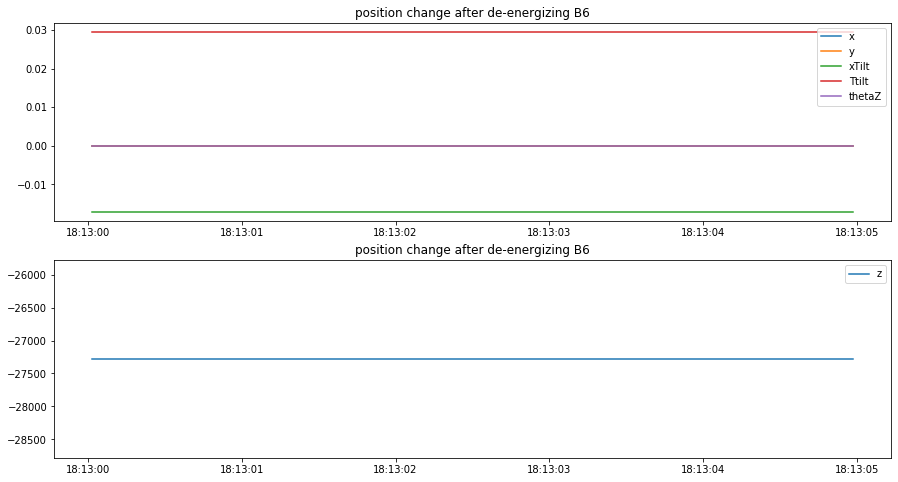

In [102]:
fig, ax = plt.subplots(2, 1, figsize=(15,8))
ax[0].plot(pd.to_datetime(df_a_B6_p.private_sndStamp, unit='s'), np.array(df_a_B6_p.xPosition)-np.array(df_b_B6_p.xPosition), label='x')
ax[0].plot(pd.to_datetime(df_a_B6_p.private_sndStamp, unit='s'), np.array(df_a_B6_p.yPosition)-np.array(df_b_B6_p.yPosition), label='y')
ax[0].plot(pd.to_datetime(df_a_B6_p.private_sndStamp, unit='s'), np.array(df_a_B6_p.xTilt)-np.array(df_b_B6_p.xTilt), label='xTilt')
ax[0].plot(pd.to_datetime(df_a_B6_p.private_sndStamp, unit='s'), np.array(df_a_B6_p.yTilt)-np.array(df_b_B6_p.yTilt), label='Ttilt')
ax[0].plot(pd.to_datetime(df_a_B6_p.private_sndStamp, unit='s'), np.array(df_a_B6_p.thetaZPosition)-np.array(df_b_B6_p.thetaZPosition), label='thetaZ')
ax[0].set_title('position change after de-energizing B6')
ax[0].legend()

ax[1].plot(pd.to_datetime(df_a_B6_p.private_sndStamp, unit='s'), np.array(df_a_B6_p.piston)-np.array(df_b_B6_p.piston), label='z')
ax[1].set_title('position change after de-energizing B6')
ax[1].legend();

In [24]:
start = Time('2020-03-05T18:10:00') #this is UTC
end = Time('2020-03-05T18:16:05') 
df = await client.select_time_series('lsst.sal.MTM2.mirrorPositionMeasured', '*', 
                                     (start-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)

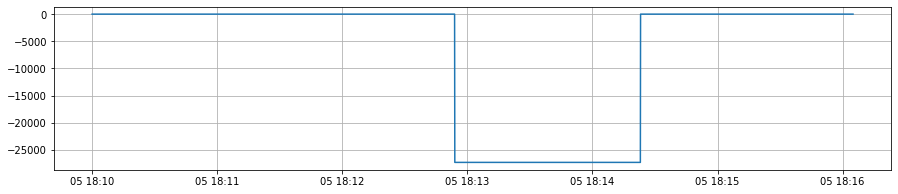

In [25]:
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(pd.to_datetime(df.private_sndStamp, unit='s'), df.piston)
plt.grid()

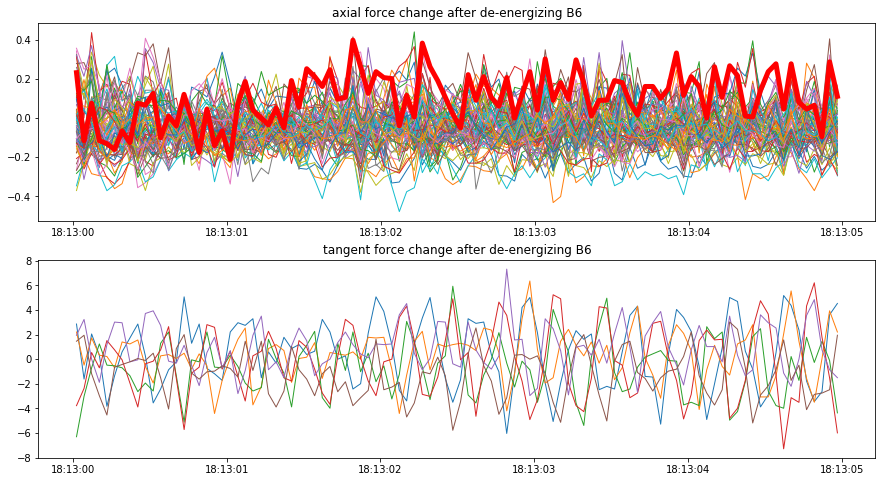

In [16]:
fig, ax = plt.subplots(2,1, figsize=(15,8))
for i in range(72):
    ax[0].plot(pd.to_datetime(df_a_B6_a.private_sndStamp, unit='s'), 
             np.array(df_a_B6_a['axialForceMeasured%d'%i])-np.array(df_b_B6_a['axialForceMeasured%d'%i]),
            linewidth=1)
i = 5
ax[0].plot(pd.to_datetime(df_a_B6_a.private_sndStamp, unit='s'), 
             np.array(df_a_B6_a['axialForceMeasured%d'%i])-np.array(df_b_B6_a['axialForceMeasured%d'%i]),'r',
            linewidth=5)
ax[0].set_title('axial force change after de-energizing B6')

for i in range(6):
    ax[1].plot(pd.to_datetime(df_a_B6_t.private_sndStamp, unit='s'), 
             np.array(df_a_B6_t['tangentLink%dDegForceMeasured'%(i*60)])-
             np.array(df_b_B6_t['tangentLink%dDegForceMeasured'%(i*60)]),
            linewidth=1)
ax[1].set_title('tangent force change after de-energizing B6');

### Before and after we unplugged C4 power

In [111]:
bC4 = Time('2020-03-05T18:15:55') #this is UTC
end = Time('2020-03-05T18:16:00') 
df_b_C4_p = await client.select_time_series('lsst.sal.MTM2.mirrorPositionMeasured', '*', 
                                     (bC4-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)
df_b_C4_a = await client.select_time_series('lsst.sal.MTM2.axialForcesMeasured', '*', 
                                     (bC4-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)
df_b_C4_t = await client.select_time_series('lsst.sal.MTM2.tangentForcesMeasured', '*', 
                                     (bC4-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)
aC4 = Time('2020-03-05T18:17:55') #this is UTC
end = Time('2020-03-05T18:18:00') 
df_a_C4_p = await client.select_time_series('lsst.sal.MTM2.mirrorPositionMeasured', '*', 
                                     (aC4-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)
df_a_C4_a = await client.select_time_series('lsst.sal.MTM2.axialForcesMeasured', '*', 
                                     (aC4-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)
df_a_C4_t = await client.select_time_series('lsst.sal.MTM2.tangentForcesMeasured', '*', 
                                     (aC4-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)

df_e = await client.select_time_series('lsst.sal.MTM2.logevent_errorCode', '*', 
                                     (bC4-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)
aa = df_e.errorCode
print('number of logevent with error = ', len(aa))
for i in np.unique(aa):
    idx = np.argmax(aa==i)
    print('%4d, 1st occurred: %s, %s'%(i, pd.to_datetime(df_e.private_sndStamp[idx], unit='s').strftime('%h-%d %H:%M'), 
                                       df_e.errorReport[idx]))

number of logevent with error =  222
   0, 1st occurred: Mar-05 18:15, Unknown reason why the error code data structure has not been initialized.
6052, 1st occurred: Mar-05 18:15, Monitoring ILC Read Error
6075, 1st occurred: Mar-05 18:16, Excessive Cell Temperature Differential
6083, 1st occurred: Mar-05 18:17, Axial Actuator Encoder Out of Range


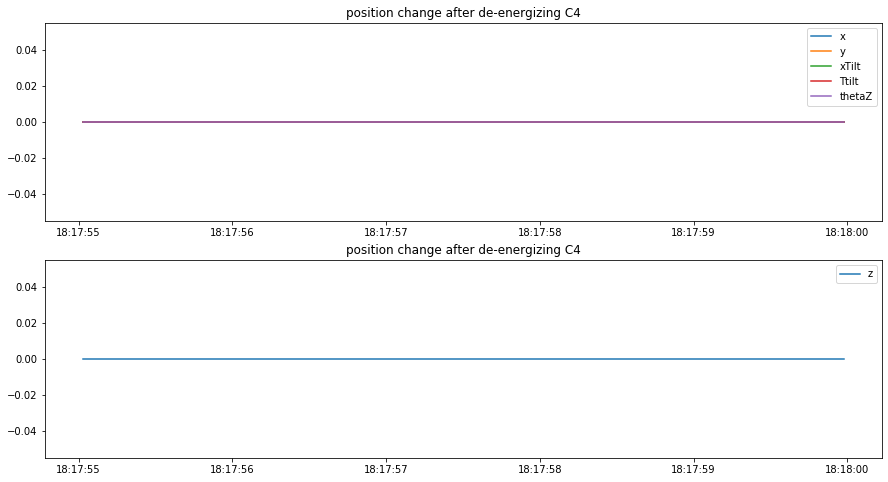

In [18]:
fig, ax = plt.subplots(2, 1, figsize=(15,8))
ax[0].plot(pd.to_datetime(df_a_C4_p.private_sndStamp, unit='s'), np.array(df_a_C4_p.xPosition)-np.array(df_b_C4_p.xPosition), label='x')
ax[0].plot(pd.to_datetime(df_a_C4_p.private_sndStamp, unit='s'), np.array(df_a_C4_p.yPosition)-np.array(df_b_C4_p.yPosition), label='y')
ax[0].plot(pd.to_datetime(df_a_C4_p.private_sndStamp, unit='s'), np.array(df_a_C4_p.xTilt)-np.array(df_b_C4_p.xTilt), label='xTilt')
ax[0].plot(pd.to_datetime(df_a_C4_p.private_sndStamp, unit='s'), np.array(df_a_C4_p.yTilt)-np.array(df_b_C4_p.yTilt), label='Ttilt')
ax[0].plot(pd.to_datetime(df_a_C4_p.private_sndStamp, unit='s'), np.array(df_a_C4_p.thetaZPosition)-np.array(df_b_C4_p.thetaZPosition), label='thetaZ')
ax[0].set_title('position change after de-energizing C4')
ax[0].legend()

ax[1].plot(pd.to_datetime(df_a_C4_p.private_sndStamp, unit='s'), np.array(df_a_C4_p.piston)-np.array(df_b_C4_p.piston), label='z')
ax[1].set_title('position change after de-energizing C4')
ax[1].legend();

In [19]:
df_b_C4_p.piston

2020-03-05 18:15:55.026000+00:00    0.085482
2020-03-05 18:15:55.077000+00:00    0.085482
2020-03-05 18:15:55.126000+00:00    0.085482
2020-03-05 18:15:55.177000+00:00    0.085482
2020-03-05 18:15:55.227000+00:00    0.085482
                                      ...   
2020-03-05 18:15:59.776000+00:00    0.085482
2020-03-05 18:15:59.828000+00:00    0.085482
2020-03-05 18:15:59.876000+00:00    0.085482
2020-03-05 18:15:59.927000+00:00    0.085482
2020-03-05 18:15:59.976000+00:00    0.085482
Name: piston, Length: 100, dtype: float64

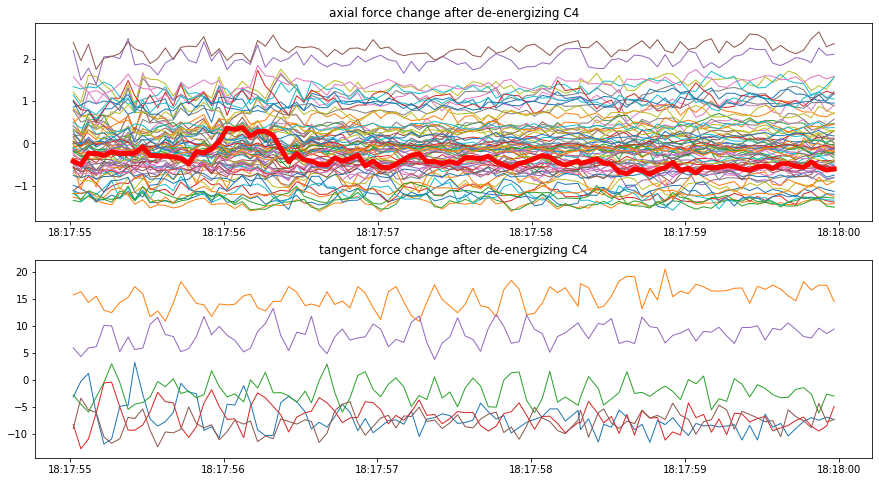

In [35]:
fig, ax = plt.subplots(2,1, figsize=(15,8))
for i in range(72):
    ax[0].plot(pd.to_datetime(df_a_C4_a.private_sndStamp, unit='s'), 
             np.array(df_a_C4_a['axialForceMeasured%d'%i])-np.array(df_b_C4_a['axialForceMeasured%d'%i]),
            linewidth=1)
i = 33 #C4 = 30+4-1
ax[0].plot(pd.to_datetime(df_a_C4_a.private_sndStamp, unit='s'), 
             np.array(df_a_C4_a['axialForceMeasured%d'%i])-np.array(df_b_C4_a['axialForceMeasured%d'%i]),'r',
            linewidth=5)
ax[0].set_title('axial force change after de-energizing C4')

for i in range(6):
    ax[1].plot(pd.to_datetime(df_a_C4_t.private_sndStamp, unit='s'), 
             np.array(df_a_C4_t['tangentLink%dDegForceMeasured'%(i*60)])-
             np.array(df_b_C4_t['tangentLink%dDegForceMeasured'%(i*60)]),
            linewidth=1)
ax[1].set_title('tangent force change after de-energizing C4');

### Before and after we unplugged D4 power

In [112]:
bD4 = Time('2020-03-05T18:21:00') #this is UTC
end = Time('2020-03-05T18:21:05') 
df_b_D4_p = await client.select_time_series('lsst.sal.MTM2.mirrorPositionMeasured', '*', 
                                     (bD4-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)
df_b_D4_a = await client.select_time_series('lsst.sal.MTM2.axialForcesMeasured', '*', 
                                     (bD4-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)
df_b_D4_t = await client.select_time_series('lsst.sal.MTM2.tangentForcesMeasured', '*', 
                                     (bD4-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)
aD4 = Time('2020-03-05T18:23:00') #this is UTC
end = Time('2020-03-05T18:23:05') 
df_a_D4_p = await client.select_time_series('lsst.sal.MTM2.mirrorPositionMeasured', '*', 
                                     (aD4-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)
df_a_D4_a = await client.select_time_series('lsst.sal.MTM2.axialForcesMeasured', '*', 
                                     (aD4-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)
df_a_D4_t = await client.select_time_series('lsst.sal.MTM2.tangentForcesMeasured', '*', 
                                     (aD4-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)

df_e = await client.select_time_series('lsst.sal.MTM2.logevent_errorCode', '*', 
                                     (bD4-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)
aa = df_e.errorCode
print('number of logevent with error = ', len(aa))
for i in np.unique(aa):
    idx = np.argmax(aa==i)
    print('%4d, 1st occurred: %s, %s'%(i, pd.to_datetime(df_e.private_sndStamp[idx], unit='s').strftime('%h-%d %H:%M'), 
                                       df_e.errorReport[idx]))

number of logevent with error =  128
   0, 1st occurred: Mar-05 18:21, Unknown reason why the error code data structure has not been initialized.
6052, 1st occurred: Mar-05 18:21, Monitoring ILC Read Error
6075, 1st occurred: Mar-05 18:21, Excessive Cell Temperature Differential
6083, 1st occurred: Mar-05 18:21, Axial Actuator Encoder Out of Range


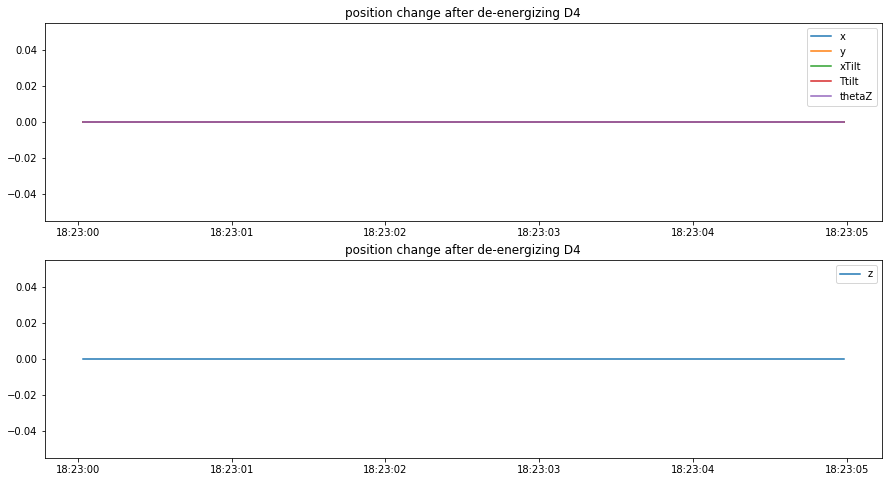

In [28]:
fig, ax = plt.subplots(2, 1, figsize=(15,8))
ax[0].plot(pd.to_datetime(df_a_D4_p.private_sndStamp, unit='s'), np.array(df_a_D4_p.xPosition)-np.array(df_b_D4_p.xPosition), label='x')
ax[0].plot(pd.to_datetime(df_a_D4_p.private_sndStamp, unit='s'), np.array(df_a_D4_p.yPosition)-np.array(df_b_D4_p.yPosition), label='y')
ax[0].plot(pd.to_datetime(df_a_D4_p.private_sndStamp, unit='s'), np.array(df_a_D4_p.xTilt)-np.array(df_b_D4_p.xTilt), label='xTilt')
ax[0].plot(pd.to_datetime(df_a_D4_p.private_sndStamp, unit='s'), np.array(df_a_D4_p.yTilt)-np.array(df_b_D4_p.yTilt), label='Ttilt')
ax[0].plot(pd.to_datetime(df_a_D4_p.private_sndStamp, unit='s'), np.array(df_a_D4_p.thetaZPosition)-np.array(df_b_D4_p.thetaZPosition), label='thetaZ')
ax[0].set_title('position change after de-energizing D4')
ax[0].legend()

ax[1].plot(pd.to_datetime(df_a_D4_p.private_sndStamp, unit='s'), np.array(df_a_D4_p.piston)-np.array(df_b_D4_p.piston), label='z')
ax[1].set_title('position change after de-energizing D4')
ax[1].legend();

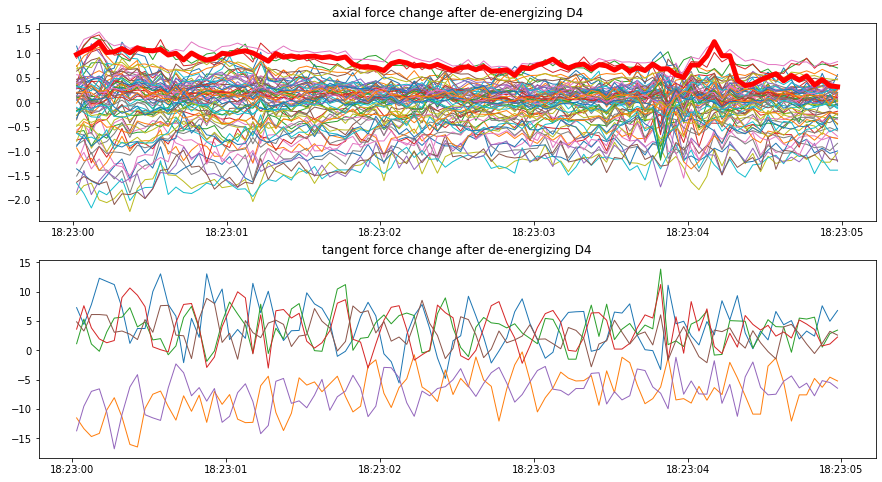

In [34]:
fig, ax = plt.subplots(2,1, figsize=(15,8))
for i in range(72):
    ax[0].plot(pd.to_datetime(df_a_D4_a.private_sndStamp, unit='s'), 
             np.array(df_a_D4_a['axialForceMeasured%d'%i])-np.array(df_b_D4_a['axialForceMeasured%d'%i]),
            linewidth=1)
i = 57 #D4 = 30+24+4-1
ax[0].plot(pd.to_datetime(df_a_D4_a.private_sndStamp, unit='s'), 
             np.array(df_a_D4_a['axialForceMeasured%d'%i])-np.array(df_b_D4_a['axialForceMeasured%d'%i]),'r',
            linewidth=5)
ax[0].set_title('axial force change after de-energizing D4')

for i in range(6):
    ax[1].plot(pd.to_datetime(df_a_D4_t.private_sndStamp, unit='s'), 
             np.array(df_a_D4_t['tangentLink%dDegForceMeasured'%(i*60)])-
             np.array(df_b_D4_t['tangentLink%dDegForceMeasured'%(i*60)]),
            linewidth=1)
ax[1].set_title('tangent force change after de-energizing D4');

### Before and after we unplugged A1 power

In [113]:
bA1 = Time('2020-03-05T18:28:00') #this is UTC
end = Time('2020-03-05T18:28:05') 
df_b_A1_p = await client.select_time_series('lsst.sal.MTM2.mirrorPositionMeasured', '*', 
                                     (bA1-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)
df_b_A1_a = await client.select_time_series('lsst.sal.MTM2.axialForcesMeasured', '*', 
                                     (bA1-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)
df_b_A1_t = await client.select_time_series('lsst.sal.MTM2.tangentForcesMeasured', '*', 
                                     (bA1-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)
aA1 = Time('2020-03-05T18:31:00') #this is UTC
end = Time('2020-03-05T18:31:05') 
df_a_A1_p = await client.select_time_series('lsst.sal.MTM2.mirrorPositionMeasured', '*', 
                                     (aA1-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)
df_a_A1_a = await client.select_time_series('lsst.sal.MTM2.axialForcesMeasured', '*', 
                                     (aA1-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)
df_a_A1_t = await client.select_time_series('lsst.sal.MTM2.tangentForcesMeasured', '*', 
                                     (aA1-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)

df_e = await client.select_time_series('lsst.sal.MTM2.logevent_errorCode', '*', 
                                     (bA1-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)
aa = df_e.errorCode
print('number of logevent with error = ', len(aa))
for i in np.unique(aa):
    idx = np.argmax(aa==i)
    print('%4d, 1st occurred: %s, %s'%(i, pd.to_datetime(df_e.private_sndStamp[idx], unit='s').strftime('%h-%d %H:%M'), 
                                       df_e.errorReport[idx]))

number of logevent with error =  167
6051, 1st occurred: Mar-05 18:28, Actuator ILC Read Error
6052, 1st occurred: Mar-05 18:28, Monitoring ILC Read Error
6067, 1st occurred: Mar-05 18:29, Power Relay Opening Fault
6071, 1st occurred: Mar-05 18:28, Single Breaker Trip
6075, 1st occurred: Mar-05 18:29, Excessive Cell Temperature Differential


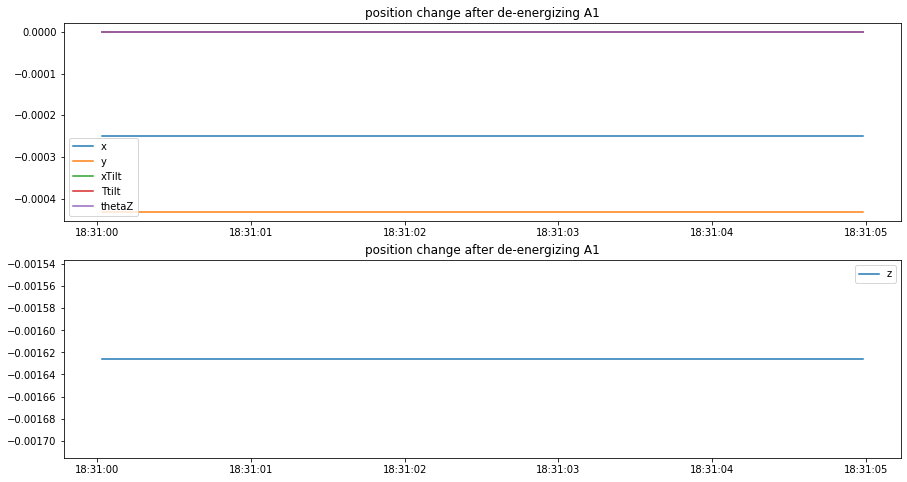

In [31]:
fig, ax = plt.subplots(2, 1, figsize=(15,8))
ax[0].plot(pd.to_datetime(df_a_A1_p.private_sndStamp, unit='s'), np.array(df_a_A1_p.xPosition)-np.array(df_b_A1_p.xPosition), label='x')
ax[0].plot(pd.to_datetime(df_a_A1_p.private_sndStamp, unit='s'), np.array(df_a_A1_p.yPosition)-np.array(df_b_A1_p.yPosition), label='y')
ax[0].plot(pd.to_datetime(df_a_A1_p.private_sndStamp, unit='s'), np.array(df_a_A1_p.xTilt)-np.array(df_b_A1_p.xTilt), label='xTilt')
ax[0].plot(pd.to_datetime(df_a_A1_p.private_sndStamp, unit='s'), np.array(df_a_A1_p.yTilt)-np.array(df_b_A1_p.yTilt), label='Ttilt')
ax[0].plot(pd.to_datetime(df_a_A1_p.private_sndStamp, unit='s'), np.array(df_a_A1_p.thetaZPosition)-np.array(df_b_A1_p.thetaZPosition), label='thetaZ')
ax[0].set_title('position change after de-energizing A1')
ax[0].legend()

ax[1].plot(pd.to_datetime(df_a_A1_p.private_sndStamp, unit='s'), np.array(df_a_A1_p.piston)-np.array(df_b_A1_p.piston), label='z')
ax[1].set_title('position change after de-energizing A1')
ax[1].legend();

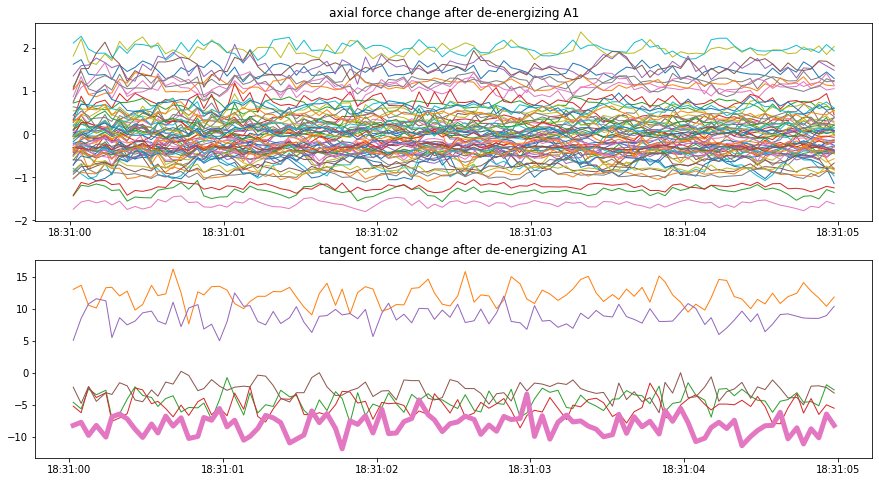

In [44]:
fig, ax = plt.subplots(2,1, figsize=(15,8))
for i in range(72):
    ax[0].plot(pd.to_datetime(df_a_A1_a.private_sndStamp, unit='s'), 
             np.array(df_a_A1_a['axialForceMeasured%d'%i])-np.array(df_b_A1_a['axialForceMeasured%d'%i]),
            linewidth=1)
ax[0].set_title('axial force change after de-energizing A1')

for i in range(6):
    ax[1].plot(pd.to_datetime(df_a_A1_t.private_sndStamp, unit='s'), 
             np.array(df_a_A1_t['tangentLink%dDegForceMeasured'%(i*60)])-
             np.array(df_b_A1_t['tangentLink%dDegForceMeasured'%(i*60)]),
            linewidth=1)
i = 0
ax[1].plot(pd.to_datetime(df_a_A1_t.private_sndStamp, unit='s'), 
             np.array(df_a_A1_t['tangentLink%dDegForceMeasured'%(i*60)])-
             np.array(df_b_A1_t['tangentLink%dDegForceMeasured'%(i*60)]),
            linewidth=5)
ax[1].set_title('tangent force change after de-energizing A1');

### Before and after we unplugged A2 power

In [114]:
bA2 = Time('2020-03-05T18:34:55') #this is UTC
end = Time('2020-03-05T18:35:00') 
df_b_A2_p = await client.select_time_series('lsst.sal.MTM2.mirrorPositionMeasured', '*', 
                                     (bA2-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)
df_b_A2_a = await client.select_time_series('lsst.sal.MTM2.axialForcesMeasured', '*', 
                                     (bA2-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)
df_b_A2_t = await client.select_time_series('lsst.sal.MTM2.tangentForcesMeasured', '*', 
                                     (bA2-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)
aA2 = Time('2020-03-05T18:36:55') #this is UTC
end = Time('2020-03-05T18:37:00') 
df_a_A2_p = await client.select_time_series('lsst.sal.MTM2.mirrorPositionMeasured', '*', 
                                     (aA2-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)
df_a_A2_a = await client.select_time_series('lsst.sal.MTM2.axialForcesMeasured', '*', 
                                     (aA2-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)
df_a_A2_t = await client.select_time_series('lsst.sal.MTM2.tangentForcesMeasured', '*', 
                                     (aA2-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)
print(len(df_b_A2_p), len(df_a_A2_p))

df_e = await client.select_time_series('lsst.sal.MTM2.logevent_errorCode', '*', 
                                     (bA2-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)
aa = df_e.errorCode
print('number of logevent with error = ', len(aa))
for i in np.unique(aa):
    idx = np.argmax(aa==i)
    print('%4d, 1st occurred: %s, %s'%(i, pd.to_datetime(df_e.private_sndStamp[idx], unit='s').strftime('%h-%d %H:%M'), 
                                       df_e.errorReport[idx]))

100 100
number of logevent with error =  175
   0, 1st occurred: Mar-05 18:34, Unknown reason why the error code data structure has not been initialized.
6051, 1st occurred: Mar-05 18:36, Actuator ILC Read Error
6052, 1st occurred: Mar-05 18:34, Monitoring ILC Read Error
6084, 1st occurred: Mar-05 18:35, Tangent Actuator Encoder Out of Range


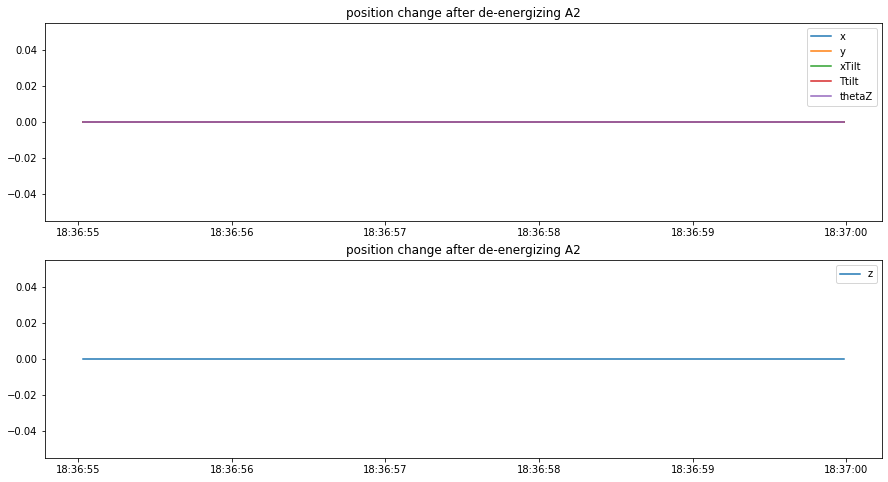

In [43]:
fig, ax = plt.subplots(2, 1, figsize=(15,8))
ax[0].plot(pd.to_datetime(df_a_A2_p.private_sndStamp, unit='s'), np.array(df_a_A2_p.xPosition)-np.array(df_b_A2_p.xPosition), label='x')
ax[0].plot(pd.to_datetime(df_a_A2_p.private_sndStamp, unit='s'), np.array(df_a_A2_p.yPosition)-np.array(df_b_A2_p.yPosition), label='y')
ax[0].plot(pd.to_datetime(df_a_A2_p.private_sndStamp, unit='s'), np.array(df_a_A2_p.xTilt)-np.array(df_b_A2_p.xTilt), label='xTilt')
ax[0].plot(pd.to_datetime(df_a_A2_p.private_sndStamp, unit='s'), np.array(df_a_A2_p.yTilt)-np.array(df_b_A2_p.yTilt), label='Ttilt')
ax[0].plot(pd.to_datetime(df_a_A2_p.private_sndStamp, unit='s'), np.array(df_a_A2_p.thetaZPosition)-np.array(df_b_A2_p.thetaZPosition), label='thetaZ')
ax[0].set_title('position change after de-energizing A2')
ax[0].legend()

ax[1].plot(pd.to_datetime(df_a_A2_p.private_sndStamp, unit='s'), np.array(df_a_A2_p.piston)-np.array(df_b_A2_p.piston), label='z')
ax[1].set_title('position change after de-energizing A2')
ax[1].legend();

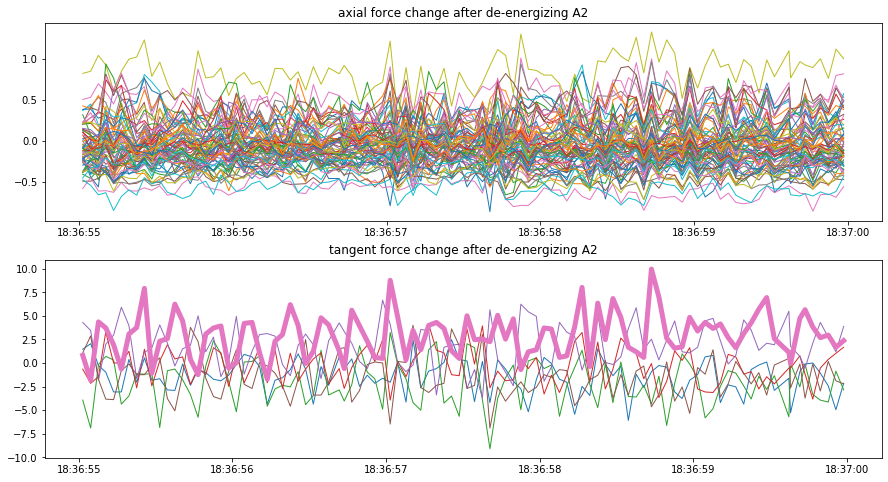

In [46]:
fig, ax = plt.subplots(2,1, figsize=(15,8))
for i in range(72):
    ax[0].plot(pd.to_datetime(df_a_A2_a.private_sndStamp, unit='s'), 
             np.array(df_a_A2_a['axialForceMeasured%d'%i])-np.array(df_b_A2_a['axialForceMeasured%d'%i]),
            linewidth=1)
ax[0].set_title('axial force change after de-energizing A2')

for i in range(6):
    ax[1].plot(pd.to_datetime(df_a_A2_t.private_sndStamp, unit='s'), 
             np.array(df_a_A2_t['tangentLink%dDegForceMeasured'%(i*60)])-
             np.array(df_b_A2_t['tangentLink%dDegForceMeasured'%(i*60)]),
            linewidth=1)
i = 1 #A2 ID = 1
ax[1].plot(pd.to_datetime(df_a_A2_t.private_sndStamp, unit='s'), 
             np.array(df_a_A2_t['tangentLink%dDegForceMeasured'%(i*60)])-
             np.array(df_b_A2_t['tangentLink%dDegForceMeasured'%(i*60)]),
            linewidth=5)
ax[1].set_title('tangent force change after de-energizing A2');

### Look at the entire time series

In [49]:
start = Time('2020-03-05T18:09:00') #this is UTC
end = Time('2020-03-05T18:39:00') 
dfp = await client.select_time_series('lsst.sal.MTM2.mirrorPositionMeasured', '*', 
                                     (start-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)
dfa = await client.select_time_series('lsst.sal.MTM2.axialForcesMeasured', '*', 
                                     (start-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)
dft = await client.select_time_series('lsst.sal.MTM2.tangentForcesMeasured', '*', 
                                     (start-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)

In [51]:
dfe = await client.select_time_series('lsst.sal.MTM2.logevent_errorCode', '*', 
                                     (start-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)

In [52]:
len(dfe)

2200

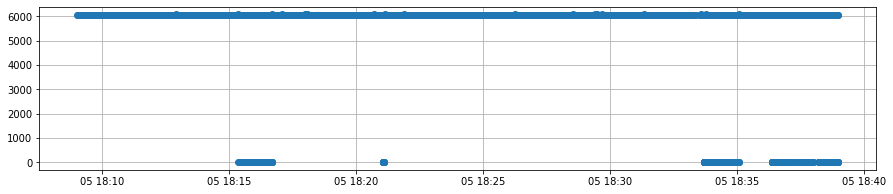

In [59]:
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(pd.to_datetime(dfe.private_sndStamp, unit='s'), dfe.errorCode,'o')
plt.grid()

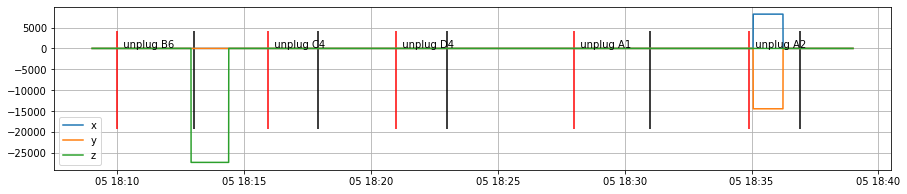

In [116]:
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(pd.to_datetime(dfp.private_sndStamp, unit='s'), dfp.xPosition, label='x')
plt.plot(pd.to_datetime(dfp.private_sndStamp, unit='s'), dfp.yPosition, label='y')
plt.plot(pd.to_datetime(dfp.private_sndStamp, unit='s'), dfp.piston, label='z')
ymin, ymax = plt.ylim()
plt.vlines(x=bB6.datetime, ymin=ymin+.25*(ymax-ymin), ymax=ymax-.15*(ymax-ymin), color='r')
plt.vlines(x=bC4.datetime, ymin=ymin+.25*(ymax-ymin), ymax=ymax-.15*(ymax-ymin), color='r')
plt.vlines(x=bD4.datetime, ymin=ymin+.25*(ymax-ymin), ymax=ymax-.15*(ymax-ymin), color='r')
plt.vlines(x=bA1.datetime, ymin=ymin+.25*(ymax-ymin), ymax=ymax-.15*(ymax-ymin), color='r')
plt.vlines(x=bA2.datetime, ymin=ymin+.25*(ymax-ymin), ymax=ymax-.15*(ymax-ymin), color='r')
plt.vlines(x=aB6.datetime, ymin=ymin+.25*(ymax-ymin), ymax=ymax-.15*(ymax-ymin), color='k')
plt.vlines(x=aC4.datetime, ymin=ymin+.25*(ymax-ymin), ymax=ymax-.15*(ymax-ymin), color='k')
plt.vlines(x=aD4.datetime, ymin=ymin+.25*(ymax-ymin), ymax=ymax-.15*(ymax-ymin), color='k')
plt.vlines(x=aA1.datetime, ymin=ymin+.25*(ymax-ymin), ymax=ymax-.15*(ymax-ymin), color='k')
plt.vlines(x=aA2.datetime, ymin=ymin+.25*(ymax-ymin), ymax=ymax-.15*(ymax-ymin), color='k')
plt.text(bB6.datetime, ymax-.25*(ymax-ymin), "  unplug B6")
plt.text(bC4.datetime, ymax-.25*(ymax-ymin), "  unplug C4")
plt.text(bD4.datetime, ymax-.25*(ymax-ymin), "  unplug D4")
plt.text(bA1.datetime, ymax-.25*(ymax-ymin), "  unplug A1")
plt.text(bA2.datetime, ymax-.25*(ymax-ymin), "  unplug A2")
plt.legend()
plt.grid()

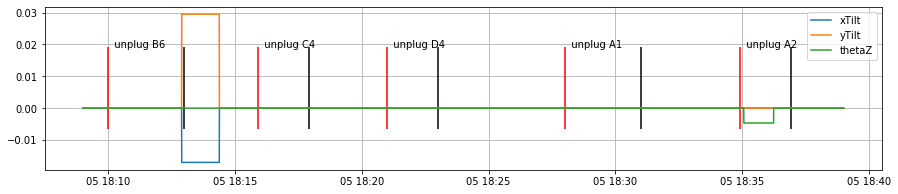

In [99]:
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(pd.to_datetime(dfp.private_sndStamp, unit='s'), dfp.xTilt, label='xTilt')
plt.plot(pd.to_datetime(dfp.private_sndStamp, unit='s'), dfp.yTilt, label='yTilt')
plt.plot(pd.to_datetime(dfp.private_sndStamp, unit='s'), dfp.thetaZPosition, label='thetaZ')
ymin, ymax = plt.ylim()
plt.vlines(x=bB6.datetime, ymin=ymin+.25*(ymax-ymin), ymax=ymax-.25*(ymax-ymin), color='r')
plt.vlines(x=bC4.datetime, ymin=ymin+.25*(ymax-ymin), ymax=ymax-.25*(ymax-ymin), color='r')
plt.vlines(x=bD4.datetime, ymin=ymin+.25*(ymax-ymin), ymax=ymax-.25*(ymax-ymin), color='r')
plt.vlines(x=bA1.datetime, ymin=ymin+.25*(ymax-ymin), ymax=ymax-.25*(ymax-ymin), color='r')
plt.vlines(x=bA2.datetime, ymin=ymin+.25*(ymax-ymin), ymax=ymax-.25*(ymax-ymin), color='r')
plt.vlines(x=aB6.datetime, ymin=ymin+.25*(ymax-ymin), ymax=ymax-.25*(ymax-ymin), color='k')
plt.vlines(x=aC4.datetime, ymin=ymin+.25*(ymax-ymin), ymax=ymax-.25*(ymax-ymin), color='k')
plt.vlines(x=aD4.datetime, ymin=ymin+.25*(ymax-ymin), ymax=ymax-.25*(ymax-ymin), color='k')
plt.vlines(x=aA1.datetime, ymin=ymin+.25*(ymax-ymin), ymax=ymax-.25*(ymax-ymin), color='k')
plt.vlines(x=aA2.datetime, ymin=ymin+.25*(ymax-ymin), ymax=ymax-.25*(ymax-ymin), color='k')
plt.text(bB6.datetime, ymax-.25*(ymax-ymin), "  unplug B6")
plt.text(bC4.datetime, ymax-.25*(ymax-ymin), "  unplug C4")
plt.text(bD4.datetime, ymax-.25*(ymax-ymin), "  unplug D4")
plt.text(bA1.datetime, ymax-.25*(ymax-ymin), "  unplug A1")
plt.text(bA2.datetime, ymax-.25*(ymax-ymin), "  unplug A2")
plt.legend()
plt.grid()

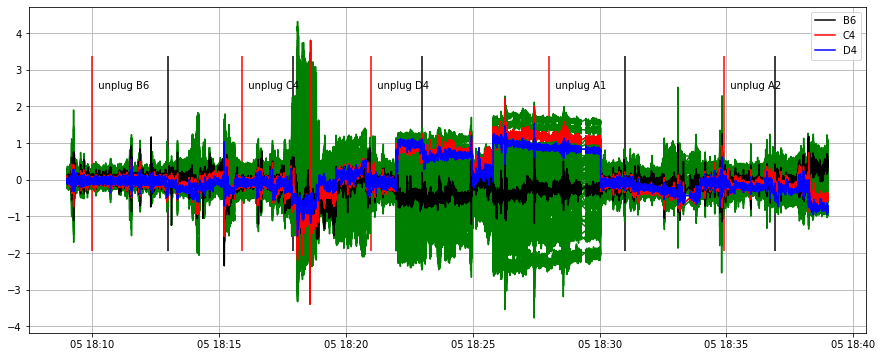

In [118]:
fig, ax = plt.subplots(figsize=(15,6))
for i in range(72):
    plt.plot(pd.to_datetime(dfp.private_sndStamp, unit='s'), dfa['axialForceMeasured%d'%i]-dfa['axialForceMeasured%d'%i][0],'g')
i=5 #B6
plt.plot(pd.to_datetime(dfp.private_sndStamp, unit='s'), 
         dfa['axialForceMeasured%d'%i]-dfa['axialForceMeasured%d'%i][0], 'k', label='B6')# linewidth=5)
i=33 #C4
plt.plot(pd.to_datetime(dfp.private_sndStamp, unit='s'), 
         dfa['axialForceMeasured%d'%i]-dfa['axialForceMeasured%d'%i][0], 'r', label='C4')# linewidth=5)
i=57 #D4
plt.plot(pd.to_datetime(dfp.private_sndStamp, unit='s'), 
         dfa['axialForceMeasured%d'%i]-dfa['axialForceMeasured%d'%i][0], 'b', label='D4') #linewidth=5)
ymin, ymax = plt.ylim()
plt.vlines(x=bB6.datetime, ymin=ymin+.25*(ymax-ymin), ymax=ymax-.15*(ymax-ymin), color='r')
plt.vlines(x=bC4.datetime, ymin=ymin+.25*(ymax-ymin), ymax=ymax-.15*(ymax-ymin), color='r')
plt.vlines(x=bD4.datetime, ymin=ymin+.25*(ymax-ymin), ymax=ymax-.15*(ymax-ymin), color='r')
plt.vlines(x=bA1.datetime, ymin=ymin+.25*(ymax-ymin), ymax=ymax-.15*(ymax-ymin), color='r')
plt.vlines(x=bA2.datetime, ymin=ymin+.25*(ymax-ymin), ymax=ymax-.15*(ymax-ymin), color='r')
plt.vlines(x=aB6.datetime, ymin=ymin+.25*(ymax-ymin), ymax=ymax-.15*(ymax-ymin), color='k')
plt.vlines(x=aC4.datetime, ymin=ymin+.25*(ymax-ymin), ymax=ymax-.15*(ymax-ymin), color='k')
plt.vlines(x=aD4.datetime, ymin=ymin+.25*(ymax-ymin), ymax=ymax-.15*(ymax-ymin), color='k')
plt.vlines(x=aA1.datetime, ymin=ymin+.25*(ymax-ymin), ymax=ymax-.15*(ymax-ymin), color='k')
plt.vlines(x=aA2.datetime, ymin=ymin+.25*(ymax-ymin), ymax=ymax-.15*(ymax-ymin), color='k')
plt.text(bB6.datetime, ymax-.25*(ymax-ymin), "  unplug B6")
plt.text(bC4.datetime, ymax-.25*(ymax-ymin), "  unplug C4")
plt.text(bD4.datetime, ymax-.25*(ymax-ymin), "  unplug D4")
plt.text(bA1.datetime, ymax-.25*(ymax-ymin), "  unplug A1")
plt.text(bA2.datetime, ymax-.25*(ymax-ymin), "  unplug A2")
plt.legend(loc='upper right')
plt.grid()

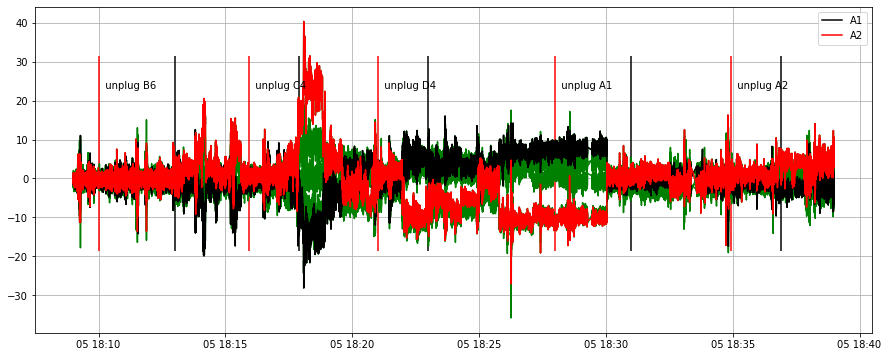

In [119]:
fig, ax = plt.subplots(figsize=(15,6))
for i in range(6):
    plt.plot(pd.to_datetime(dfp.private_sndStamp, unit='s'), 
             dft['tangentLink%dDegForceMeasured'%(i*60)]-dft['tangentLink%dDegForceMeasured'%(i*60)][0],'g')
i=0 #A1
plt.plot(pd.to_datetime(dfp.private_sndStamp, unit='s'),  
             dft['tangentLink%dDegForceMeasured'%(i*60)]-dft['tangentLink%dDegForceMeasured'%(i*60)][0], 'k', label='A1')# linewidth=5)
i=1 #A2
plt.plot(pd.to_datetime(dfp.private_sndStamp, unit='s'),  
             dft['tangentLink%dDegForceMeasured'%(i*60)]-dft['tangentLink%dDegForceMeasured'%(i*60)][0], 'r', label='A2')# linewidth=5)
ymin, ymax = plt.ylim()
plt.vlines(x=bB6.datetime, ymin=ymin+.25*(ymax-ymin), ymax=ymax-.15*(ymax-ymin), color='r')
plt.vlines(x=bC4.datetime, ymin=ymin+.25*(ymax-ymin), ymax=ymax-.15*(ymax-ymin), color='r')
plt.vlines(x=bD4.datetime, ymin=ymin+.25*(ymax-ymin), ymax=ymax-.15*(ymax-ymin), color='r')
plt.vlines(x=bA1.datetime, ymin=ymin+.25*(ymax-ymin), ymax=ymax-.15*(ymax-ymin), color='r')
plt.vlines(x=bA2.datetime, ymin=ymin+.25*(ymax-ymin), ymax=ymax-.15*(ymax-ymin), color='r')
plt.vlines(x=aB6.datetime, ymin=ymin+.25*(ymax-ymin), ymax=ymax-.15*(ymax-ymin), color='k')
plt.vlines(x=aC4.datetime, ymin=ymin+.25*(ymax-ymin), ymax=ymax-.15*(ymax-ymin), color='k')
plt.vlines(x=aD4.datetime, ymin=ymin+.25*(ymax-ymin), ymax=ymax-.15*(ymax-ymin), color='k')
plt.vlines(x=aA1.datetime, ymin=ymin+.25*(ymax-ymin), ymax=ymax-.15*(ymax-ymin), color='k')
plt.vlines(x=aA2.datetime, ymin=ymin+.25*(ymax-ymin), ymax=ymax-.15*(ymax-ymin), color='k')
plt.text(bB6.datetime, ymax-.25*(ymax-ymin), "  unplug B6")
plt.text(bC4.datetime, ymax-.25*(ymax-ymin), "  unplug C4")
plt.text(bD4.datetime, ymax-.25*(ymax-ymin), "  unplug D4")
plt.text(bA1.datetime, ymax-.25*(ymax-ymin), "  unplug A1")
plt.text(bA2.datetime, ymax-.25*(ymax-ymin), "  unplug A2")
plt.legend(loc='upper right')
plt.grid()